<a href="https://colab.research.google.com/github/camrespicio/Google-Play-Store---App-Research/blob/main/Capstone_3_Google_Play_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Play Store - App Research

The purpose of this notebook is to determine if there are any characteristics of mobile apps that have standalone influence on how the end users rate applications in the Google Play Store. This is meant to benefit tech companies and app developers that primarily distribute their platforms via mobile app. They could use the results of this research to guide their decision on the types of applications they build now or in the future. 

In [ ]:
import pandas as pd
import seaborn as sns
import math
from scipy import stats
from google.colab import drive
drive.mount('/content/gdrive')

# There is a item in the Size column that does not conform to the bucket type, so it is being converted to a null value to be removed later.

raw_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/googleplaystore.csv', na_values = ['Varies with device'])
raw_df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,8-Jun-18,NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


Of the data in this dataset, I will test for app categories, file sizes, and the prices. I will determine if there is any significant difference in an app's average score based on any change to the characteristics listed above. First, I will isolate the three columns of interest along with the Rating column to eliminate any clutter.

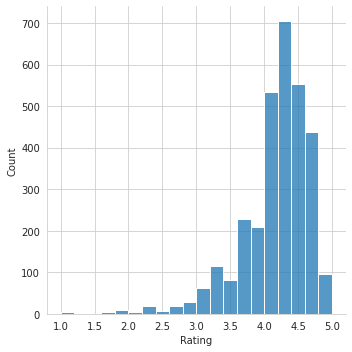

In [ ]:
playstore_df = raw_df.groupby(['Category', 'Size', 'Type'])['Rating'].mean().reset_index()

# Create a histogram of all ratings to get a visual sense of how the ratings are disributed.

sns.set_style('whitegrid')
ax = sns.displot(playstore_df['Rating'], bins = 20)

In [ ]:
playstore_df['Rating'].describe()

count    3116.000000
mean        4.148079
std         0.507124
min         1.000000
25%         3.980000
50%         4.233333
75%         4.466667
max         5.000000
Name: Rating, dtype: float64

The statistical summary supports what the above historgram illustrates in that the average of all ratings is 4.15.

In [ ]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  3493 non-null   object 
 1   Size      3493 non-null   object 
 2   Type      3493 non-null   object 
 3   Rating    3116 non-null   float64
dtypes: float64(1), object(3)
memory usage: 109.3+ KB


There are 3,493 total rows, but only 3,116 valid ratings are present, so I will need to purge the 377 rows with a null value for a rating by using the .dropna() function. I am renaming the cleaned dataframe to call upon for all testing later.

In [ ]:
print(playstore_df.size)
clean_playstore = playstore_df.dropna()
print(clean_playstore.size)

13972
12464


In [ ]:
# The dataframe has been purged of all null values. 

clean_playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3116 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  3116 non-null   object 
 1   Size      3116 non-null   object 
 2   Type      3116 non-null   object 
 3   Rating    3116 non-null   float64
dtypes: float64(1), object(3)
memory usage: 121.7+ KB


First we will test app categories for statistical significance in ratings. 

$H_ø$ : There is no statistical significance in ratings of the five most common app categories.

$H_a$ : There is statistical significance in the ratings of the five most common app categories.

In [ ]:
print('There are {} unique categories.'.format(clean_playstore['Category'].nunique()))

There are 33 unique categories.


In [ ]:
category_counts = clean_playstore['Category'].value_counts()
category_counts.head()

FAMILY             285
TOOLS              215
GAME               197
PERSONALIZATION    158
MEDICAL            152
Name: Category, dtype: int64

The above `category_counts` variable reveals the five most common app categories out of 33 that have been reviewed in the Play Store. We will bucket those five categories into another variable named `top_5_categories`, and group all other categories outside the top five into their own bucket named `else_categories`. 

In [ ]:
top_5_categories = clean_playstore.loc[clean_playstore['Category'].isin(['FAMILY', 'TOOLS', 'GAME', 'PERSONALIZATION', 'MEDICAL'])]
top_5_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 801 to 3272
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1007 non-null   object 
 1   Size      1007 non-null   object 
 2   Type      1007 non-null   object 
 3   Rating    1007 non-null   float64
dtypes: float64(1), object(3)
memory usage: 39.3+ KB


In [ ]:
else_categories = clean_playstore.loc[~clean_playstore['Category'].isin(['FAMILY', 'TOOLS', 'GAME', 'PERSONALIZATION', 'MEDICAL'])]
else_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  2109 non-null   object 
 1   Size      2109 non-null   object 
 2   Type      2109 non-null   object 
 3   Rating    2109 non-null   float64
dtypes: float64(1), object(3)
memory usage: 82.4+ KB


In [ ]:
# Creating a function that can be used to determine the mean ratings of each bucket.

def avg_rating(array_1, array_2):
  avg_1 = array_1.mean()
  avg_2 = array_2.mean()
  return('The average rating score for the treatment group is ' + str(avg_1) + ', and the control group is ' + str(avg_2) + '.')

In [ ]:
avg_rating(top_5_categories['Rating'], else_categories['Rating'])

'The average rating score for the treatment group is 4.169606675451918, and the control group is 4.137799796352423.'

Calling upon the `avg_rating` function. The average rating of apps in the top five categories is 4.17 and all others are 4.14. At just 0.03 higher than apps outside the top five, the difference in negligible. However, now we must test for statistical significance so we can either reject or accept the null hyposthesis.

In [ ]:
stats.ttest_ind(top_5_categories['Rating'], else_categories['Rating'])

Ttest_indResult(statistic=1.6378653762419007, pvalue=0.10155081246090494)

With a p-value of 0.1, we must accept the null that there is no statistically significant difference in the average ratings between the top five most common app categories and all others that fall outside.

In [ ]:
# Creating a definition that will be used to define the confidence intervals. It will be called upon for all future hypotheses as well.

def get_95_ci(array_1, array_2):
  sample_1_n = array_1.shape[0]
  sample_2_n = array_2.shape[0]
  sample_1_mean = array_1.mean()
  sample_2_mean = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()
  mean_difference = sample_2_mean - sample_1_mean
  std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
  margin_of_error = 1.96 * std_err_difference
  ci_lower = mean_difference - margin_of_error
  ci_upper = mean_difference + margin_of_error
  return('The difference in means at the 95% confidence interval (two-tail) is between ' + str(ci_lower) + ' and ' + str(ci_upper) + '.')

In [ ]:
get_95_ci(top_5_categories['Rating'], else_categories['Rating'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.068654076474871 and 0.005040318275881042.'

Calling upon the `get_95_ci` function, we can determine that the difference is not significant at the <0.05 level. With 95% confidence, the difference is between -0.069 and 0.005.



Next, we will test app sizes for statistical significance in ratings. 

$H_ø$ : There is no statistical significance in ratings of apps with the most common app sizes.

$H_a$ : There is statistical significance in ratings of apps with the most common app sizes.

In [ ]:
print('There are {} unique app sizes.'.format(clean_playstore['Size'].nunique()))

There are 413 unique app sizes.


In [ ]:
# These are the top 10 app sizes that are most common.

size_counts = clean_playstore['Size'].value_counts()
size_counts.head(10)

11M    37
12M    36
15M    35
14M    33
20M    32
24M    32
18M    32
21M    32
19M    32
22M    31
Name: Size, dtype: int64

The above `size_counts` variable reveals the ten most common app sizes out of 413 that have been reviewed in the Play Store. We will bucket those ten sizes into another variable named `top_10_sizes`, and group all other sizes outside the top ten into their own bucket named `else_sizes`. 

In [ ]:
top_10_sizes = clean_playstore.loc[clean_playstore['Size'].isin(['11M', '12M', '15M', '14M', '18M', '19M', '21M', '20M', '24M', '23M'])]
top_10_sizes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 3 to 3464
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  332 non-null    object 
 1   Size      332 non-null    object 
 2   Type      332 non-null    object 
 3   Rating    332 non-null    float64
dtypes: float64(1), object(3)
memory usage: 13.0+ KB


In [ ]:
else_sizes = clean_playstore.loc[~clean_playstore['Size'].isin(['11M', '12M', '15M', '14M', '18M', '19M', '21M', '20M', '24M', '23M'])]
else_sizes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  2784 non-null   object 
 1   Size      2784 non-null   object 
 2   Type      2784 non-null   object 
 3   Rating    2784 non-null   float64
dtypes: float64(1), object(3)
memory usage: 108.8+ KB


In [ ]:
avg_rating(top_10_sizes['Rating'], else_sizes['Rating'])

'The average rating score for the treatment group is 4.1910945434376625, and the control group is 4.1429491035438355.'

Calling upon the `avg_rating` function. The average rating of apps in the top 10 most common file sizes is 4.19 and all others are 4.14. Much like our testing of the app categories, our difference in means is quite small at 0.05. However small, we must still test for statistical significance in the average ratings.

In [ ]:
stats.ttest_ind(top_10_sizes['Rating'], else_sizes['Rating'])

Ttest_indResult(statistic=1.635544655114245, pvalue=0.1020359857738854)

In [ ]:
get_95_ci(top_10_sizes['Rating'], else_sizes['Rating'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.09655625902512535 and 0.00026537923747130265.'

Again, we must accept the null that there is no significant difference in the average ratings of app sizes that fall within the ten most common sizes and all others.

Calling upon the `get_95_ci` function, we can determine that the difference is significant at the <0.05 level. With 95% confidence, the difference is between -0.097 and 0.003.

Last up, we will test free vs. paid apps for statistical significance in ratings. 

$H_ø$ : There is no statistical significance in ratings of free apps and paid apps.

$H_a$ : There is statistical significance in ratings of free apps and paid apps.

In [ ]:
type_counts = clean_playstore['Type'].value_counts()
type_counts

Free    2687
Paid     429
Name: Type, dtype: int64

There are only two possible values in the Type column, them being Free or Paid. We will place all free apps in a variable called `free_apps` and paid apps is another appropriately named variable, `paid_apps`. 

In [ ]:
free_apps = clean_playstore.loc[clean_playstore['Type'] == 'Free']
free_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2687 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  2687 non-null   object 
 1   Size      2687 non-null   object 
 2   Type      2687 non-null   object 
 3   Rating    2687 non-null   float64
dtypes: float64(1), object(3)
memory usage: 105.0+ KB


In [ ]:
paid_apps = clean_playstore.loc[clean_playstore['Type'] == 'Paid']
paid_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 21 to 3489
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  429 non-null    object 
 1   Size      429 non-null    object 
 2   Type      429 non-null    object 
 3   Rating    429 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.8+ KB


In [ ]:
avg_rating(free_apps['Rating'], paid_apps['Rating'])

'The average rating score for the treatment group is 4.136915351630139, and the control group is 4.218000333000334.'

Calling upon the `avg_rating` function to produce the ratings for each variable, we see that free apps have an average rating of 4.14 and paid apps have one of 4.22. This is interesting because I would figure that free apps would tend to have a higher average rating. Whatever the case may be, we will still need to test if this difference is significant. 

In [ ]:
# Reject the null that there is not a difference in ratings between free apps and paid apps.

stats.ttest_ind(free_apps['Rating'], paid_apps['Rating'])

Ttest_indResult(statistic=-3.0795008411714644, pvalue=0.0020915622039028793)

In [ ]:
# Call the get_95_ci definition created when testing the first null hypothesis.
# The difference is significant at the <.05 level

get_95_ci(free_apps['Rating'], paid_apps['Rating'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.024091080206150327 and 0.13807888253423886.'

We can reject the null that there is no significant difference between the average ratings of free apps and paid apps with a p-value of 0.002.

Calling upon the `get_95_ci` function, we can determine that the difference is significant at the <0.05 level. With 95% confidence, the difference is between 0.024 and 0.138.

# What did we learn?

Of the three characteristics that we tested for a significant difference in average rating, we can determine that only one of three were significant in their higher average ratings.

* The five most common app categories in Family, Tools, Games, Personalization, and Medical on average have a higher rating of 0.03, but is not statistically significant.

* The ten most common app sizes in 11mb, 12mb, 14mb, 15mb, 18mb, 19mb, 20mb, 21mb, 22mb, and 24mb on average have a higher rating of 0.05, but is not statistically significant.

* Paid apps on average have a higher rating than free apps by 0.08, and is statistically significant.

# How to use this information

Between both app categories and app sizes, there is such a vast pool of possibilities that can produce very different results. While we determined earlier on that the difference in their average ratings were not significant, they are quite small to the point where the difference is negligible anyways.

It gets interesting when we look at free and paid apps. I think the key takeaway here is not to inherently charge for an app just to charge for it. It should be that you should not immediately dismiss the idea of charging for it because as the data tells us, paid apps yielded more positive reviews despite requiring payment to install.